In [4]:
from pathlib import Path  # Standard Python Module
import time  # Standard Python Module
import pandas as pd
import os
import datetime
from datetime import date
import warnings
import re
warnings.filterwarnings('ignore') 
import regex
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords
import numpy as np
import cv2
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bnlp.corpus import stopwords, punctuations

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
SOURCE_DIR = 'comment'

In [ ]:
excel_files = list(Path(SOURCE_DIR).glob('*.xlsx'))
excel_files

[PosixPath('comment/youtube-comments6352e028181a6-WgvaqhgFFDo.xlsx'),
 PosixPath('comment/youtube-comments6352e10b38732-84bsr0t1KaQ.xlsx'),
 PosixPath('comment/youtube-comments6352e06a264f6-8tlChA0WtbQ.xlsx'),
 PosixPath('comment/youtube-comments6352e0a59e022-WJNn1us-C7s.xlsx'),
 PosixPath('comment/youtube-comments6352dfa0931fe-Qq0ctiUlL60.xlsx'),
 PosixPath('comment/youtube-comments6352dec44d0dc-FJ4FYFPbUVM.xlsx'),
 PosixPath('comment/youtube-comments6352de7816b2d-Izkeu4JD7Vs.xlsx'),
 PosixPath('comment/youtube-comments6352de297f015-lMaxeDDp8zo.xlsx'),
 PosixPath('comment/facebook-comments6352ddace8ca1-pfbid02w7x8u6X4nJHXGS1JHFH6VQuCWYLmHBj1S2qxa1y9CXD5hHfYfrvGLQbFH8mYNAAql.xlsx'),
 PosixPath('comment/facebook-comments6352dd1551285-1522825584844919.xlsx'),
 PosixPath('comment/facebook-comments6352dd66681d7-pfbid087da2vDSPq4vocTfvDVgqvzKfwZ2Qq2Gve7ovyyiH1ydsh6LyMPBqcG6Q6FazJZZl.xlsx'),
 PosixPath('comment/facebook-comments6352dd8606bdb-pfbid0999hfNYcMa7WyssPyZXdUjTJNXe1wh2m333ek8hxkAfB

In [ ]:
comment = pd.DataFrame()
sentiment = pd.DataFrame()

In [ ]:
for excel_file in excel_files:
    print(excel_file)
    df = pd.read_excel(excel_file)
    df = df.iloc[5: , 2:]
    del df["Unnamed: 4"]
    del df["Unnamed: 6"]
    del df["Unnamed: 5"]
    del df["Unnamed: 8"]
    comment = comment.append(df, ignore_index=True)

comment/youtube-comments6352e028181a6-WgvaqhgFFDo.xlsx
comment/youtube-comments6352e10b38732-84bsr0t1KaQ.xlsx
comment/youtube-comments6352e06a264f6-8tlChA0WtbQ.xlsx
comment/youtube-comments6352e0a59e022-WJNn1us-C7s.xlsx
comment/youtube-comments6352dfa0931fe-Qq0ctiUlL60.xlsx
comment/youtube-comments6352dec44d0dc-FJ4FYFPbUVM.xlsx
comment/youtube-comments6352de7816b2d-Izkeu4JD7Vs.xlsx
comment/youtube-comments6352de297f015-lMaxeDDp8zo.xlsx
comment/facebook-comments6352ddace8ca1-pfbid02w7x8u6X4nJHXGS1JHFH6VQuCWYLmHBj1S2qxa1y9CXD5hHfYfrvGLQbFH8mYNAAql.xlsx
comment/facebook-comments6352dd1551285-1522825584844919.xlsx
comment/facebook-comments6352dd66681d7-pfbid087da2vDSPq4vocTfvDVgqvzKfwZ2Qq2Gve7ovyyiH1ydsh6LyMPBqcG6Q6FazJZZl.xlsx
comment/facebook-comments6352dd8606bdb-pfbid0999hfNYcMa7WyssPyZXdUjTJNXe1wh2m333ek8hxkAfBhQSEGaFaipC6jsiPbSVzl.xlsx
comment/facebook-comments6352dc303a61b-415976600640901.xlsx
comment/facebook-comments6352dbd953f8c-1534314776988415.xlsx
comment/facebook-comments6352

In [ ]:
comment.columns =['Commenter_Name', 'DateTime', 'Comment']

In [ ]:
comment

,Commenter_Name,DateTime,Comment
0,Anowarul Islam,2022-10-12 08:59:20,আওয়ামী লীগ ভোট চোর আওয়ামী পতন চাই
1,Kazi Sohag,2022-10-12 09:00:50,"ঢাকা, কুমিল্লা থেকেও গেছে।"
2,মঈন হক,2022-10-12 09:03:50,এইডা বলে লাখো মানুষ 🤣🤣🤣
3,EDUCARE JOB CARNIVAL,2022-10-12 09:05:47,জ্বলে ...।। জ্বলে
4,KHOKON TOFAL UDDIN,2022-10-12 09:07:15,এগিয়ে জান সফল হবে ইনশাআল্লাহ
...,...,...,...
1920,MD Fokrul,ID: 100007118412401,নিরপক্ষ নির্দলীয় তথ্যাবদায়ক সরকারের অধিনে জাতী...
1921,MD Fokrul,ID: 100007118412401,খালেদা জিয়ার তারেক রহমানের মুক্তি চাই
1922,MD Fokrul,ID: 100007118412401,জাতীর ভোটের অধিকার ফিরিয়ে দেওয়া হোক
1923,MD Fokrul,ID: 100007118412401,দ্রব্য মূল্যের দাম স্থিতিশিল


In [ ]:
comment = comment.drop_duplicates()

In [ ]:
comment

,Commenter_Name,DateTime,Comment
0,Anowarul Islam,2022-10-12 08:59:20,আওয়ামী লীগ ভোট চোর আওয়ামী পতন চাই
1,Kazi Sohag,2022-10-12 09:00:50,"ঢাকা, কুমিল্লা থেকেও গেছে।"
2,মঈন হক,2022-10-12 09:03:50,এইডা বলে লাখো মানুষ 🤣🤣🤣
3,EDUCARE JOB CARNIVAL,2022-10-12 09:05:47,জ্বলে ...।। জ্বলে
4,KHOKON TOFAL UDDIN,2022-10-12 09:07:15,এগিয়ে জান সফল হবে ইনশাআল্লাহ
...,...,...,...
1920,MD Fokrul,ID: 100007118412401,নিরপক্ষ নির্দলীয় তথ্যাবদায়ক সরকারের অধিনে জাতী...
1921,MD Fokrul,ID: 100007118412401,খালেদা জিয়ার তারেক রহমানের মুক্তি চাই
1922,MD Fokrul,ID: 100007118412401,জাতীর ভোটের অধিকার ফিরিয়ে দেওয়া হোক
1923,MD Fokrul,ID: 100007118412401,দ্রব্য মূল্যের দাম স্থিতিশিল


In [ ]:
comment['Comment'] = comment['Comment'].astype(str)

In [ ]:
def remove_punc_imoji_non_bengali_word(text):
    t = regex.findall(r"[\p{Bengali}]+", text)
    text = ' '.join(t)
    text = re.sub('[^\u0980-\u09FF]',' ',str(text))
#     #stop word
#     text = remove_stopwords(text, stopwords)
    return text

In [ ]:
comment['Comment'] = comment['Comment'].apply(remove_punc_imoji_non_bengali_word)

In [ ]:
# Length of each Comments
comment['length'] = comment['Comment'].apply(lambda x:len(x.split()))
# Remove the Comments with least words
dataset = comment.loc[comment.length>3]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Comments".format(len(comment)-len(dataset)),
      "\nTotal Comments:",len(dataset))

After Cleaning: 
Removed 784 Small Comments 
Total Comments: 1032


In [ ]:
def remove_stop_word(text):
    result = remove_stopwords(text, stopwords)
    result =" ".join(result)
    return result

In [ ]:
dataset['CommentStopWord'] = dataset['Comment'].apply(remove_stop_word)

In [ ]:
dataset
dataset.to_csv('dataset.csv')

In [ ]:
sentiment['texts'] = dataset['CommentStopWord']

In [ ]:
# comment.columns =['Commenter_Name', 'DateTime', 'Comment']
sentiment

,texts
0,আওয়ামী লীগ ভোট চোর আওয়ামী পতন চাই
1,ঢাকা কুমিল্লা
2,এইডা লাখো মানুষ
3,এগিয়ে জান সফল ইনশাআল্লাহ
4,আরে পলোগ্রাউন্ডে বৃষ্টি
...,...
1027,নিরপক্ষ নির্দলীয় তথ্যাবদায়ক সরকারের অধিনে জাতী...
1028,খালেদা জিয়ার তারেক রহমানের মুক্তি চাই
1029,জাতীর ভোটের অধিকার ফিরিয়ে
1030,দ্রব্য মূল্যের দাম স্থিতিশিল


In [ ]:
a, b, c, d, e = np.array_split(sentiment, 5)

In [ ]:
list_of_datasets = [a, b, c, d, e]
for index, dataset in enumerate(list_of_datasets):
    filepath = os.path.join('dataset_'+str(index)+'.csv')
    dataset.to_csv(filepath)

### after getting sentiment from https://sentiment.bangla.gov.bd/sentiment-emotion-analysis

In [ ]:
a = pd.read_csv('dataset_0_sentiment.csv')
b = pd.read_csv('dataset_1_sentiment.csv')
c = pd.read_csv('dataset_2_sentiment.csv')
d = pd.read_csv('dataset_3_sentiment.csv')
e = pd.read_csv('dataset_4_sentiment.csv')

In [ ]:
list_of_datasets = [a, b, c, d, e]
After_sentiment = pd.DataFrame()
for index, dataset in enumerate(list_of_datasets):
    After_sentiment = After_sentiment.append(dataset, ignore_index=True)

In [ ]:
After_sentiment

,paragraph,error_message,polarity_class,polarity_score,emotion
0,আওয়ামী লীগ ভোট চোর আওয়ামী পতন চাই,NaN,stronglyNegative,-0.999174,"{""neutral"":0.0005518239340744913,""happy"":0.000..."
1,ঢাকা কুমিল্লা,NaN,neutral,0.199982,"{""neutral"":0.9988032579421997,""happy"":0.000717..."
2,এইডা লাখো মানুষ,NaN,stronglyPositive,0.756651,"{""neutral"":0.1823209971189499,""happy"":0.334712..."
3,এগিয়ে জান সফল ইনশাআল্লাহ,NaN,stronglyPositive,0.999938,"{""neutral"":0.029964102432131767,""happy"":0.9809..."
4,আরে পলোগ্রাউন্ডে বৃষ্টি,NaN,weaklyNegative,-0.599743,"{""neutral"":0.3097646236419678,""happy"":0.067977..."
...,...,...,...,...,...
1027,নিরপক্ষ নির্দলীয় তথ্যাবদায়ক সরকারের অধিনে জা...,NaN,stronglyPositive,0.878115,"{""neutral"":0.9864662289619446,""happy"":0.002785..."
1028,খালেদা জিয়ার তারেক রহমানের মুক্তি চাই,NaN,weaklyPositive,0.599947,"{""neutral"":0.01447356678545475,""happy"":0.00266..."
1029,জাতীর ভোটের অধিকার ফিরিয়ে,NaN,weaklyPositive,0.488074,"{""neutral"":0.6873162388801575,""happy"":0.025855..."
1030,দ্রব্য মূল্যের দাম স্থিতিশিল,NaN,weaklyNegative,-0.599686,"{""neutral"":0.27926620841026306,""happy"":0.04005..."


In [ ]:
After_sentiment.to_csv('After_sentiment.csv')


### WordCloud

In [1]:
!sudo apt-get install libfreetype6-dev libharfbuzz-dev libfribidi-dev gtk-doc-tools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libharfbuzz-dev is already the newest version (1.7.2-1ubuntu1).
libharfbuzz-dev set to manually installed.
libfreetype6-dev is already the newest version (2.8.1-2ubuntu2.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  docbook docbook-to-man docbook-xml docbook-xsl highlight highlight-common
  liblua5.2-0 libosp5 opensp python-funcsigs python-mock python-pbr
  python-pkg-resources python-six sgml-base sgml-data xml-core xsltproc
Suggested packages:
  docbook-defguide docbook-dsssl psgml dbtoepub docbook-xsl-doc-html
  | docbook-xsl-doc-pdf | docbook-xsl-doc-text | docbook-xsl-doc
  docbook-xsl-saxon fop libsaxon-java libxalan2-java libxslthl-java xalan
  dblatex doc-base python-funcsigs-doc python-mock-doc python-setuptools
  sgml-base-doc perl

In [2]:
!wget -O raqm-0.7.0.tar.gz https://raw.githubusercontent.com/python-pillow/pillow-depends/master/raqm-0.7.0.tar.gz

--2022-11-09 05:54:27--  https://raw.githubusercontent.com/python-pillow/pillow-depends/master/raqm-0.7.0.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 683634 (668K) [application/octet-stream]
Saving to: ‘raqm-0.7.0.tar.gz’

raqm-0.7.0.tar.gz   100%[===================>] 667.61K  --.-KB/s    in 0.04s   

2022-11-09 05:54:28 (15.0 MB/s) - ‘raqm-0.7.0.tar.gz’ saved [683634/683634]



In [3]:
!tar -xzvf raqm-0.7.0.tar.gz

raqm-0.7.0/
raqm-0.7.0/ltmain.sh
raqm-0.7.0/missing
raqm-0.7.0/AUTHORS
raqm-0.7.0/config.h.in
raqm-0.7.0/Makefile.in
raqm-0.7.0/Makefile.am
raqm-0.7.0/configure.ac
raqm-0.7.0/configure
raqm-0.7.0/src/
raqm-0.7.0/src/raqm.c
raqm-0.7.0/src/Makefile.in
raqm-0.7.0/src/Makefile.am
raqm-0.7.0/src/raqm.h
raqm-0.7.0/src/raqm-version.h
raqm-0.7.0/src/raqm-version.h.in
raqm-0.7.0/compile
raqm-0.7.0/test-driver
raqm-0.7.0/depcomp
raqm-0.7.0/raqm.pc.in
raqm-0.7.0/COPYING
raqm-0.7.0/install-sh
raqm-0.7.0/NEWS
raqm-0.7.0/aclocal.m4
raqm-0.7.0/gtk-doc.make
raqm-0.7.0/README
raqm-0.7.0/config.guess
raqm-0.7.0/tests/
raqm-0.7.0/tests/direction-rtl-4.test
raqm-0.7.0/tests/direction-ltr-1.test
raqm-0.7.0/tests/direction-rtl-1.test
raqm-0.7.0/tests/direction-ltr-5.test
raqm-0.7.0/tests/Makefile.in
raqm-0.7.0/tests/Makefile.am
raqm-0.7.0/tests/runtest.py
raqm-0.7.0/tests/languages-sr-ru.test
raqm-0.7.0/tests/cursor_position_GB8a.test
raqm-0.7.0/tests/scripts-forward-rtl.test
raqm-0.7.0/tests/cursor_positio

In [4]:
cd raqm-0.7.0

/content/raqm-0.7.0


In [5]:
!./configure --prefix=/usr && make -j4 && sudo make -j4 install

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking whether make supports nested variables... yes
checking whether make supports nested variables... (cached) yes
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking whether gcc understands -c and -o together... yes
checking whether make supports the include directive... yes (GNU style)
checking dependency style of gcc... gcc3
checking for gcc option to accept ISO C99... non

In [6]:
cd ..

/content


In [7]:
pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.2 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [8]:
pip install --upgrade Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 34.6 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [1]:
pip install plotly==5.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 67.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [2]:
pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 51.6 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/mdforhadcse/SQL-for-Data-Science/main/dataset.csv')
df
del df['Unnamed: 0']

In [10]:
print(df.columns)

Index(['Commenter_Name', 'DateTime', 'Comment', 'length', 'CommentStopWord'], dtype='object')


In [13]:
cleaned_text = df['CommentStopWord']
cleaned_text

0                       আওয়ামী লীগ ভোট চোর আওয়ামী পতন চাই
1                                           ঢাকা কুমিল্লা
2                                         এইডা লাখো মানুষ
3                                এগিয়ে জান সফল ইনশাআল্লাহ
4                                 আরে পলোগ্রাউন্ডে বৃষ্টি
                              ...                        
1027    নিরপক্ষ নির্দলীয় তথ্যাবদায়ক সরকারের অধিনে জাতী...
1028                খালেদা জিয়ার তারেক রহমানের মুক্তি চাই
1029                            জাতীর ভোটের অধিকার ফিরিয়ে
1030                         দ্রব্য মূল্যের দাম স্থিতিশিল
1031                        বলেছিল মানুষ ১০ ১৫হাজার হা হা
Name: CommentStopWord, Length: 1032, dtype: object

In [14]:
refined_sentence = " ".join(cleaned_text)

In [15]:
refined_sentence

'আওয়ামী লীগ ভোট চোর আওয়ামী পতন চাই ঢাকা কুমিল্লা এইডা লাখো মানুষ এগিয়ে জান সফল ইনশাআল্লাহ আরে পলোগ্রাউন্ডে বৃষ্টি বিএনপি এগিয়ে সকল প্রতিকূলতা উপেক্ষা এম পির লোক দেখলে আওয়ামী লীগ সরকার দলের কাউয়া কাদের পাগল আরো পাগল হয়ে শুষ্ঠ নির্বাচন জনগণ ভোট প্রশাসন হাহাহা পুলিশ জনগণের বিরুদ্ধে তারাও দেশদ্রোহী হয়ে জালিমের ক্ষমতা চিরস্থায়ী ইতিহাস সাক্ষী জালিমের পরাজিতা সুনিশ্চিত ভারত বলছি তোমাদের সরকার জুলুম জনতার জালিম ক্ষমতা চিরস্থায়ী ইনশাআল্লাহ ভারত বলছি জনগণের কথা যাব ভারত বাংলাদেশের মানুষের রইল ভালোবাসা এন অবৈধ দল চোরের দল খুনী দল জনগন জানে সারা মাট খালি এন অবৈধ দলের দালাল সার্কাস বিনোদন পাটি সারা মাট খালি এন জনগন সবাই শান্তি শৃঙ্খলা বজায় আন্দোলন আপনাদের সমাবেশের জাতে মানুষের ক্ষয় ক্ষতি যেখানেই বাঁধা আসবে সেখানেই প্রতিরোধ জনগণের বিজয় হবেই ইনশাআল্লাহ বানচত ইউটিউবার সকালের খবর দেখাছ কার খবর সৈরাচার অবৈধ দখল দার নির্লজ্জ বেহায়া হাসিনা সরকারের পতন অনিবার্য লাঠি ছাড়া বিক্লব এন পির বাঁশে লাঠি তৈরি কর খুনি হাসিনা বিদাই কর আলহামদুলিল্লাহ বিএমপি আসবে লাভ ইউ বিএনপি বিএনপি জিন্দাবাদ সমাবেশ সফল আরে সাংবাদিক

In [17]:
!wget https://www.omicronlab.com/download/fonts/kalpurush.ttf

--2022-11-09 06:06:51--  https://www.omicronlab.com/download/fonts/kalpurush.ttf
Resolving www.omicronlab.com (www.omicronlab.com)... 172.104.46.32
Connecting to www.omicronlab.com (www.omicronlab.com)|172.104.46.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 314592 (307K) [application/octet-stream]
Saving to: ‘kalpurush.ttf.1’

kalpurush.ttf.1     100%[===================>] 307.22K   322KB/s    in 1.0s    

2022-11-09 06:06:53 (322 KB/s) - ‘kalpurush.ttf.1’ saved [314592/314592]



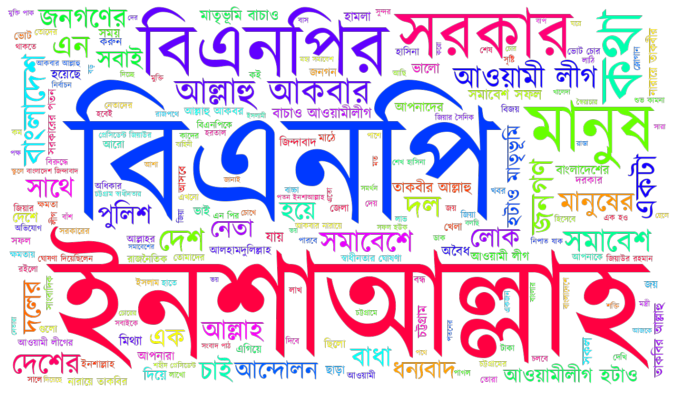

In [23]:
regex = r"[\u0980-\u09FF]+"
reg = re.compile(r'[a-zA-Z]')


wc = WordCloud(width=1400, height=800, mode="RGBA",background_color=None, colormap="hsv",
               stopwords = stopwords, font_path="kalpurush.ttf", regexp=regex).generate(refined_sentence)

plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

result = wc.to_file("BNP somabesh.png")